In [1]:
from rdkit import Chem
from model import MolGen

# load data
data = []
with open('qm9.csv', "r") as f:
    for line in f.readlines()[1:]:
        data.append(line.split(",")[1])

# create model
gan_mol = MolGen(data, hidden_dim=64, lr=1e-3, device="cuda")

In [8]:
# create dataloader
loader = gan_mol.create_dataloader(data, batch_size=128, shuffle=True, num_workers=10)

# train model for 10000 steps
gan_mol.train_n_steps(loader, max_step=10000, evaluate_every=100)

['COC1C(=O)C=CC1O', 'COC1=CC(O)OC1C']
valid =  0.70
['CC1=CC2OC2(C)C1#N', 'CC1COC2C=CC=C12']
valid =  0.75
['OC12CCC1C(O1)C(C)O2', 'OCC1OC2OCC1CC2=O']
valid =  0.79
['OCC1CCCC(=O)C1O', 'CNC1=NCC=CCN1']
valid =  0.83
['CCCOC1(CC1)C#N', 'CCOCOCC1(C)CC1']
valid =  0.73
['CC1C2OC(CC12)C#C', 'CC12OC(=N)CC12CC#N']
valid =  0.83
['CC(O)C12CC1(C)CO2', 'CC1OC(=O)C(=N)C=C1']
valid =  0.86
['CC(CCoC)CO', 'CCCC(C)C#CC=N']
valid =  0.86
['CCC1CN1C=O', 'CC1COCOC=C1']
valid =  0.81
['OC1CC2NC2C11', 'CC1CNC(=O)N1']
valid =  0.79
['C(C)CNC(CO)C#N', 'O=C1C(OC1)C(C)C#N']
valid =  0.74
['CC12CCC1(C)C=CO2', 'CCC1C(=O)C1C#N']
valid =  0.86
['O=NC1OCC=C1', 'CN=NC(=O)N(C=O)NC=O']
valid =  0.82
['C1OC2(C)C(=N)OC12', 'C1(C)OC1CN=N1']
valid =  0.75
['CC1C2OC=CC2C1O', 'CCC#CC(O)C1CCC1']
valid =  0.89
['O=CC1CNC1C#N', 'OC1CC2(C)NC1C2O']
valid =  0.83
['CCN1CC(=O)C1C=O', 'C#CC1CN2C(CO)C12']
valid =  0.78
['CC1CN2CC12C#C', 'CN1COCC1C=O']
valid =  0.80
['COCC(=O)C(=O)CO', 'OC1CC2(OC12)C#C']
valid =  0.85
['CC1(C)COC2

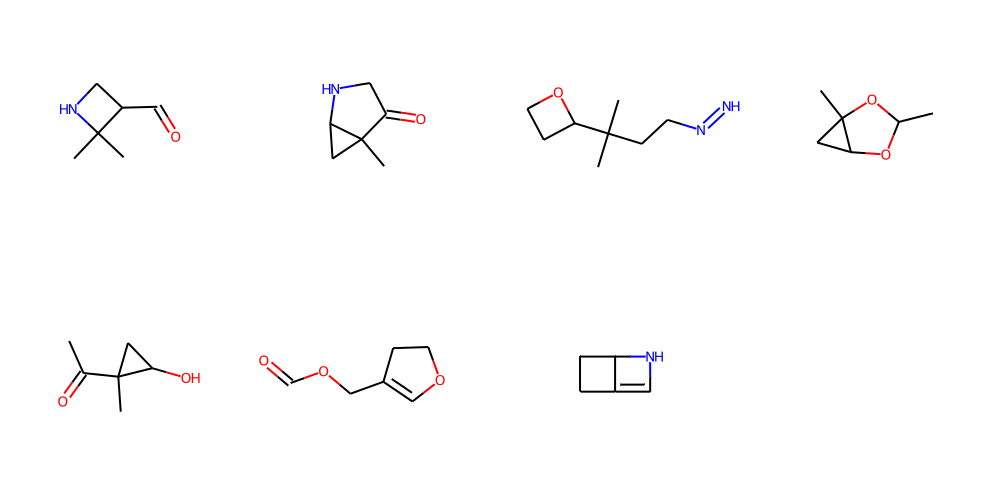

In [17]:
# After training
# generate Smiles molecules
smiles_list = gan_mol.generate_n(8)

# convert with rdkit
mol_list = [Chem.MolFromSmiles(m) for m in smiles_list]

# draw
Chem.Draw.MolsToGridImage(mol_list, molsPerRow=4, subImgSize=(250, 250), maxMols=10)